<img src="../fasp/runner/credits/images/FASPNotebook09.jpg" style="float: right;">

### BioDataCatalyst and CRDC Search-Locate-Compute

* Search:
 * CRDC - GECCO Data
 * BioDataCatalyst - COPDGene
* Locate:
 * CRDC DRS Service
 * BioDataCatalyst DRS Service
* Compute: 
 * CRDC - Seven Bridges CGC
 * ISB-CGC (Google Cloud)

This script runs the same work as FASPScript9 and uses FASPRunner twice

In [2]:
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.loc import DRSMetaResolver
from fasp.workflow import GCPLSsamtools, sbcgcWESClient
from fasp.search import BigQuerySearchClient, DiscoverySearchClient

faspRunner = FASPRunner(program='FASPNotebook09.ipynb')
runNote = 'Two dbGaP Sources, CRDC and BioDataCatalyst'

### Step 1 - Discovery
Query for relevant DRS objects

In [3]:
# TCGA Query - CRDC
crdcquery = '''SELECT sp.dbGaP_Subject_ID,
'sbcgc:'||sb_drs_id FROM dbgap_demo.scr_gecco_susceptibility.subject_phenotypes_multi sp
join dbgap_demo.scr_gecco_susceptibility.sample_multi sm on sm.dbgap_subject_id = sp.dbgap_subject_id
join dbgap_demo.scr_gecco_susceptibility.sb_drs_index di on di.sample_id = sm.sample_id 
where AGE between 45 and 55 and sex = 'Female' and file_type = 'cram' limit 3'''


bdcquery = '''
    SELECT sp.dbGaP_Subject_ID,  'bdc:'||read_drs_id
    FROM `isbcgc-216220.COPDGene.Subject_MULTI` sm
    join `isbcgc-216220.COPDGene.Subject_Phenotypes_HMB` sp on sp.dbgap_subject_id = sm.dbgap_subject_id
    join `isbcgc-216220.COPDGene.COPD_DRS` drs on drs.su_submitter_id = sm.subject_id
    where gender = '2'
    and Age_Enroll between 45 and 55
    LIMIT 3'''

searchClient = DiscoverySearchClient('https://ga4gh-search-adapter-presto-public.prod.dnastack.com/')
drsClient = DRSMetaResolver()

# Step 3 - set up a class that runs samtools for us
# providing the location for the resultssettings = faspRunner.settings
settings = faspRunner.settings
wesClient = sbcgcWESClient(settings['SevenBridgesProject'])

faspRunner.configure(searchClient, drsClient, wesClient)
runList = faspRunner.runQuery(crdcquery, runNote)

Searching the GA4GH registry for org.ga4gh:drs services
Running query
SELECT sp.dbGaP_Subject_ID,
'sbcgc:'||sb_drs_id FROM dbgap_demo.scr_gecco_susceptibility.subject_phenotypes_multi sp
join dbgap_demo.scr_gecco_susceptibility.sample_multi sm on sm.dbgap_subject_id = sp.dbgap_subject_id
join dbgap_demo.scr_gecco_susceptibility.sb_drs_index di on di.sample_id = sm.sample_id 
where AGE between 45 and 55 and sex = 'Female' and file_type = 'cram' limit 3
_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
subject=2474312, drsID=sbcgc:5baa8cece4b0db63859e6590
workflow submitted, run:cb4713f5-568e-4019-b86b-a3a27140dc8e
____________________________________________________________
subject=2473610, drsID=sbcgc:5baa8d0be4b0db63859e6843
workflow submitted, run:48d44c09-6d90-4318-81e1-16b5fe5b1d68
____________________________________________________________
subject=2474054, dr

### BioDataCatalyst runs	

In [4]:
searchClient = BigQuerySearchClient()
gcplocation = 'projects/{}/locations/{}'.format(settings['GCPProject'], settings['GCPPipelineRegion'])
wesClient = GCPLSsamtools(gcplocation, settings['GCPOutputBucket'])


faspRunner.configure(searchClient, drsClient, wesClient)
runList = faspRunner.runQuery(bdcquery, runNote)

Running query

    SELECT sp.dbGaP_Subject_ID,  'bdc:'||read_drs_id
    FROM `isbcgc-216220.COPDGene.Subject_MULTI` sm
    join `isbcgc-216220.COPDGene.Subject_Phenotypes_HMB` sp on sp.dbgap_subject_id = sm.dbgap_subject_id
    join `isbcgc-216220.COPDGene.COPD_DRS` drs on drs.su_submitter_id = sm.subject_id
    where gender = '2'
    and Age_Enroll between 45 and 55
    LIMIT 3
subject=599754, drsID=bdc:dg.4503/22b61280-5d92-413b-bca6-ae674ee16d14
workflow submitted, run:10796449958580678646
____________________________________________________________
subject=600588, drsID=bdc:dg.4503/e5529a06-5022-42f1-bddb-761d34d2f4f1
workflow submitted, run:2497755560539929518
____________________________________________________________
subject=595520, drsID=bdc:dg.4503/35599dbc-e531-4a83-97a4-6a74587d2a78
workflow submitted, run:17902599479779506025
____________________________________________________________


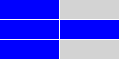

In [5]:
faspRunner.getFASPicon()

In [6]:
faspRunner.rollCredits()

DiscoverySearchClient    BigQuerySearchClient     
DRSMetaResolver          DRSMetaResolver          
sbcgcWESClient           GCPLSsamtools            
